In [125]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
import shutil
import os

In [112]:
def add_random_straight_lines(image,height, width):
  ''' Add random straight lines to the image '''
  num_lines_hor = np.random.randint(0, 3) # number of lines to be added
  num_lines_vert = np.random.randint(0, 3)
  if num_lines_hor != 0:
    y0 = int(height/num_lines_hor) # gap/width between each lines
  if num_lines_vert != 0:
    x0 = int(height/num_lines_vert)
  for i in range(num_lines_hor):
    line_thickness = np.random.randint(1, 4)
    x1, x2 = 0, width # starting and ending x coordinates
    y = y0*(i+1) + np.random.randint(-0.05*height, 0.05*height) # y coordinate of line
    image = cv2.line(image, (x1, y), (x2, y), (0, 0, 0), thickness=line_thickness) #draw line
    prev_y = y
  for i in range(num_lines_vert):
    line_thickness = np.random.randint(1, 4)
    y1, y2 = 0, height # starting and ending x coordinates
    x = x0*(i+1) + np.random.randint(-0.05*width, 0.05*width) # y coordinate of line
    image = cv2.line(image, (x, y1), (x, y2), (0, 0, 0), thickness=line_thickness) #draw line
    prev_x = x
  return image

In [96]:
def add_random_text(image, height, width):
  ''' Add random texts to the image '''
  text = ''.join(random.choices('абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯabcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789', k=random.randint(1, 8)))

  #font = [cv2.FONT_HERSHEY_DUPLEX, cv2.FONT_HERSHEY_COMPLEX, cv2.FONT_HERSHEY_TRIPLEX, cv2.FONT_HERSHEY_COMPLEX_SMALL]
  font = [cv2.FONT_HERSHEY_COMPLEX]
  y = np.random.randint(0.2*height, 1.02*height)
  x = np.random.randint(0.0005*width, 0.8*width)
  fontScale = np.random.random() + 0.7
  thickness = np.random.randint(1, 3)
  image = cv2.putText(image, text, (x, y), np.random.choice(font), fontScale, (0, 0, 0), thickness, cv2.LINE_AA)
  return image

In [38]:
def add_random_dots(image, height, width):
  """Добавляет случайные точки на изображение."""
  number_of_dots = random.randint(0, 50)
  color = (0, 0, 0)
  thickness = -1
  for _ in range(number_of_dots):
    x, y = random.randint(0, width), random.randint(0, height)
    radius = random.randint(1, 5)
    image = cv2.circle(image, (x,y), radius, color, thickness)
  return image

In [117]:
def process_image(image):
  height, width, _ = image.shape
  words = random.randint(0, 3)
  for i in range(words):
    image = add_random_text(image, height, width)
  image = add_random_straight_lines(image, height, width)
  image = add_random_dots(image, height, width)
  return image

array([[[253, 253, 245],
        [253, 253, 245],
        [253, 253, 245],
        ...,
        [252, 253, 242],
        [253, 253, 245],
        [253, 253, 245]],

       [[246, 253, 245],
        [253, 253, 245],
        [253, 253, 245],
        ...,
        [253, 253, 245],
        [253, 253, 245],
        [253, 253, 245]],

       [[253, 253, 245],
        [253, 253, 245],
        [253, 253, 245],
        ...,
        [253, 253, 245],
        [253, 253, 245],
        [253, 253, 245]],

       ...,

       [[253, 253, 245],
        [253, 253, 245],
        [253, 253, 245],
        ...,
        [253, 253, 245],
        [253, 253, 245],
        [253, 253, 245]],

       [[253, 253, 245],
        [253, 253, 245],
        [253, 253, 245],
        ...,
        [253, 253, 245],
        [253, 253, 245],
        [253, 253, 245]],

       [[253, 253, 245],
        [253, 253, 245],
        [253, 253, 245],
        ...,
        [253, 253, 245],
        [253, 253, 245],
        [253, 253, 245]]], dtype=uint8)
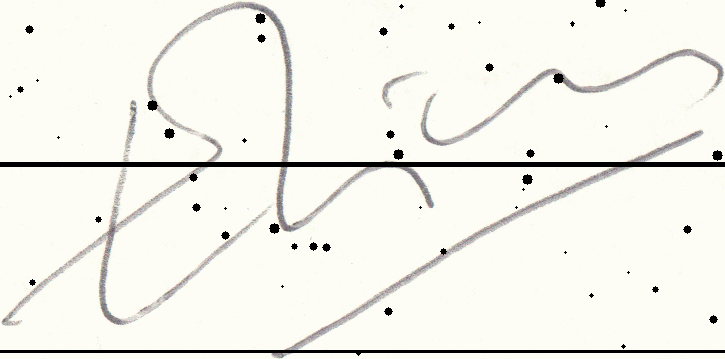

In [123]:
imagepath = '/content/001_01.PNG'
image = cv2.imread(imagepath)
image = process_image(image)
image
#cv2.imwrite('test1.png', image)

#Преобразуем датасет в нужную структуру

In [133]:
# apply image augumentations and save them
root_path = '/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/A'
for root, dirs, files in os.walk(root_path):
    for filename in files:
        image = cv2.imread(os.path.join(root, filename))
        image = process_image(image)
        cv2.imwrite(f'/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/B/{filename}', image)
        print(f'/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/B/{filename}')
#         shutil.move(os.path.join(root, filename), 'gan-sign_data_kaggle/images/')

/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/B/001_14.PNG
/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/B/001_13.PNG
/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/B/001_10.PNG
/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/B/001_12.PNG
/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/B/001_09.PNG
/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/B/001_08.PNG
/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/B/001_07.PNG
/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/B/001_04.PNG
/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/B/001_03.PNG
/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/B/001_05.PNG
/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/B/001_06.PNG
/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/B/001_11.PNG
/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/B/001_02.PNG
/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/B/001_01.PNG
/content/drive/MyDrive/gan_images/gan-sign_data_

In [136]:
# splitting into train and test
root = '/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/'
srcA_path = '/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/A/'
srcB_path = '/content/drive/MyDrive/gan_images/gan-sign_data_kaggle/B/'

trainA_path = '/content/drive/MyDrive/gan_images/gan_signdata_kaggle (copy)/trainA/'
testA_path = '/content/drive/MyDrive/gan_images/gan_signdata_kaggle (copy)/testA/'


trainB_path = '/content/drive/MyDrive/gan_images/gan_signdata_kaggle (copy)/trainB/'
testB_path = '/content/drive/MyDrive/gan_images/gan_signdata_kaggle (copy)/testB/'

In [137]:
def split_data(src_path, train_path, test_path, split_ratio):
    files = np.array(os.listdir(src_path))
    np.random.shuffle(files)
    split_index = int(split_ratio * len(files))
    testA = files[0:split_index]
    trainA = files[split_index:]
    [shutil.copy(os.path.join(src_path, path), os.path.join(train_path, path)) for path in trainA]
    [shutil.copy(os.path.join(src_path, path), os.path.join(test_path, path)) for path in testA]

split_data(srcA_path, trainA_path, testA_path, 0.1)
split_data(srcB_path, trainB_path, testB_path, 0.1)

#Transforming images to CycleGAN input format

In [138]:
# to find the maximum width and height present in the images
from PIL import Image
import os, sys
size_images = dict()

for dirpath, _, filenames in os.walk(trainA_path):
    for path_image in filenames:
        image = os.path.abspath(os.path.join(dirpath, path_image))
        with Image.open(image) as img:
            width, heigth = img.size
            size_images[path_image] = {'width': width, 'heigth': heigth}
print(size_images)

{'015_02.PNG': {'width': 703, 'heigth': 398}, '11_062.png': {'width': 836, 'heigth': 501}, '009_09.PNG': {'width': 519, 'heigth': 223}, '10_029.png': {'width': 742, 'heigth': 181}, '001_23.PNG': {'width': 815, 'heigth': 316}, '12_055.png': {'width': 442, 'heigth': 279}, '012_09.PNG': {'width': 674, 'heigth': 340}, '11_066.png': {'width': 511, 'heigth': 256}, '09_026.png': {'width': 594, 'heigth': 268}, '12_030.png': {'width': 420, 'heigth': 317}, '02_019.png': {'width': 545, 'heigth': 362}, '01_038.png': {'width': 617, 'heigth': 265}, '001_02.PNG': {'width': 754, 'heigth': 383}, '07_061.png': {'width': 415, 'heigth': 103}, '04_063.png': {'width': 469, 'heigth': 359}, '11_054.png': {'width': 528, 'heigth': 170}, '006_21.PNG': {'width': 610, 'heigth': 213}, '04_044.png': {'width': 614, 'heigth': 153}, '006_17.PNG': {'width': 502, 'heigth': 208}, '006_19.PNG': {'width': 535, 'heigth': 230}, '04_049.png': {'width': 653, 'heigth': 537}, '03_034.png': {'width': 789, 'heigth': 251}, '02_029.p

In [139]:
import os
from PIL import Image
im_size = 512
def make_square(image, min_size=512, fill_color=(255, 255, 255, 0)):
    ''' Resize image as a square with signature in the center and black(transparent) strips at top and bottom. '''
    x, y = image.size
    size = max(min_size, x, y)
    new_im = Image.new('RGBA', (size, size), fill_color)
    new_im.paste(image, (int((size - x) / 2), int((size - y) / 2)))
    new_im = new_im.resize((im_size, im_size))
    return new_im

def resize_images(path):
    ''' Function to resize the images to the ip format for gans. '''
    dirs = os.listdir(path)
    for item in dirs:
        if os.path.isfile(path+item):
            image = Image.open(path+item)
            image = make_square(image)
            image.save(path+item)

resize_images(trainA_path)
resize_images(trainB_path)
resize_images(testA_path)
resize_images(testB_path)